In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

import experiment_helpers as eh
import game_engine as ge
import train

In [2]:
# Eager execution makes the training and execution ~25x slower.
tf.compat.v1.disable_eager_execution()

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(9,)))
model.add(tf.keras.layers.Dense(18, activation='sigmoid'))
model.add(tf.keras.layers.Dense(18, activation='sigmoid'))
model.add(tf.keras.layers.Dense(9, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 18)                180       
_________________________________________________________________
dense_4 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 171       
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


In [10]:
num_games = 100000
start_time = time.time()
(outcomes, metadata) = train.q_learning(model, num_games)
end_time = time.time()
total_time = end_time - start_time
print("total time:", total_time)

Game 1 of 100000.
Game 10001 of 100000.
Game 20001 of 100000.
Game 30001 of 100000.
Game 40001 of 100000.
Game 50001 of 100000.
Game 60001 of 100000.
Game 70001 of 100000.
Game 80001 of 100000.
Game 90001 of 100000.
total time: 1897.8185489177704


In [11]:
(invalid, loss, tie, win) = eh.calculate_training_sequence(outcomes)

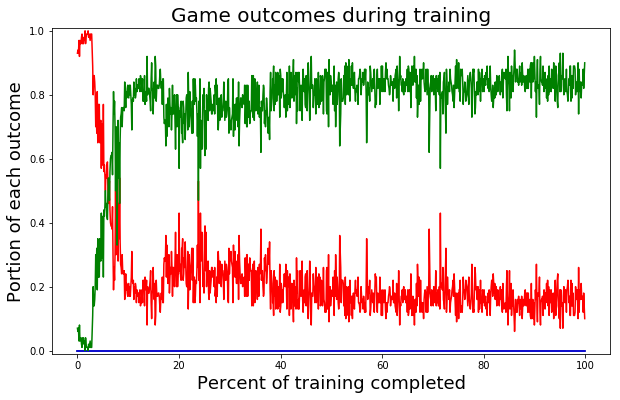

In [20]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
x_length = len(invalid)
x_vals = np.array(range(x_length)) * 100 / x_length
ax.plot(x_vals, invalid, 'r')
ax.plot(x_vals, loss, 'k')
ax.plot(x_vals, tie, 'b')
ax.plot(x_vals, win, 'g')
ax.set_ylim(-0.01, 1.01)
ax.set_title('Game outcomes during training', fontsize=20)
ax.set_xlabel('Percent of training completed', fontsize=18)
ax.set_ylabel('Portion of each outcome', fontsize=18)
plt.show()

In [15]:
metadata

{'decay_factor': 0.999,
 'eps': 1.769263844171567e-44,
 'num_games': 100000,
 'opponent': 'random',
 'rewards': (0, 0.25, 0.5, 2),
 'state_values': (1, 0, -1),
 'y': 0.95}

In [14]:
# Calculate head-to-head stats vs a random player.
stats = eh.head_to_head(model, 'random')
stats

Game 1 of 1000.
Game 101 of 1000.
Game 201 of 1000.
Game 301 of 1000.
Game 401 of 1000.
Game 501 of 1000.
Game 601 of 1000.
Game 701 of 1000.
Game 801 of 1000.
Game 901 of 1000.


{'percent_loss': 0.373, 'percent_tie': 0.063, 'percent_win': 0.564}

In [16]:
# Save the model
model_directory = 'model_v3'

In [17]:
model.save(model_directory)

INFO:tensorflow:Assets written to: model_v3\assets
